### Dataset

In this project we will create a data set simulating a real world phenomenon. As for a long time in my professional life I was part of the commercial area, so I chose to create hypothetical products and their respective variables for those who know how to predict a possible monthly revenue.

As variables we will basically need:

- the product itself - data such as names and may contain models
- quantity - integer data
- price - data of decimal numbers
- date - simulation of the date they were sold

### Import Libraries

We will start by reserving a cell to import all the libraries we will need in this project.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import datetime
from datetime import timedelta
from datetime import date

### Building the database

To guide this sample of the best selling brands I used as a guide a survey on the website "Best Selling Cars" [1] 

To generate car brands and real prices, a sample of the data set referred to was used.[2]

To build a data set I initially included the data in a list-like variable and then transformed it into a dictionary to find the "key: value" pair.

Unlike lists in which elements are accessed through a position or index, in dictionaries, information is accessed using keys. The elements of a dictionary are stored in an unordered manner. They use a pair structure containing key and value "{key:value}", so that their elements are unique, although the elements of a value can be duplicated since the key is different. For that, I used the dict () constructor to create dictionaries directly from strings of key-value pairs, as shown in the example below. [3] 

In [2]:
# Creating a list with tuples inside to simulate a pair of values, as the dictionary requires.
l1 = [("banana", 81),("orange", 84)]

# Transforming the list into a dictionary
l2 = dict(l1) 

print(l2)

{'banana': 81, 'orange': 84}


After the main variables defined I created an empty data set to guide the columns (variables) that I would work on. For that I used the Pandas library. [4] 

Finally I started my loop to include information on 100 rows of the data set. Using the "df.loc[]" for each indexer i of the 100 row loop I insert each variable stored in this loop in the data set. [5] In this loop I started by including the keys to my dictionary in the "Products" column and then, to track each key, its respective values in the "Price" column. I used the random.choice() function for this. [6] 

After that I needed to include random dates to simulate the purchase date of each vehicle. I called the random_time function to create such a scenario. I first used a date.today () date class to start counting in a global variable "start_dt", replacing the day and month since January 2020 and turning the date into an ordinal number through date.toordinal [7], as the idea was to create the scenario for the entire year. [8]. The same thought I did for the final count included in the variable "end_dt".

The variable random_day that randomly chooses a date between ordinal numbers of start and end (January 2020 until December 2020) and then turns them back into date through date.fromordinal() [9], needed to be inside a loop for the 100 lines to be chosen.

According to website 'Unleashed Software' I was able to verify that car sales go up in the spring and autumn, due to new models introduced in the market and fall at the end and beginning of the year because of the taxes that people usually pay.[10]. In this way, the random_time function exactly simulates this seasonality. A normal distribution has been included so that the numbers look more natural when chosen.[11]

In [3]:
# First we choose the columns (variables)
columns = ['Product', 'Price', 'Quantity Ordered', 'Date']
# a list of cars has been included to represent the products
products = ['chevrolet', 'dodge', 'honda', 'isuzu', 'mitsubishi', 'toyota', 'volkswagen', 'nissan', 'mazda', 'peugot', 'alfa-romero', 'audi', 'volvo', 'bmw', 'porsche', 'mercedes-benz', 'jaguar']
# a list of prices has been included to represent each car brand
prices = [6007, 7875, 8184, 8916, 9239, 9885, 10077, 10415, 10652, 15489, 15498, 17859, 18063, 26118, 31400, 33647, 34600]
# a dictionary was generated so that the car brand key matches the price of the car
prod_pri = dict(zip(products, prices))

# to create a empty Data set
df = pd.DataFrame(columns=columns)
df

start_dt = date.today().replace(day=1, month=1).toordinal() # I change the date into an ordinal number and limit it to month 1, as the initial value
end_dt = date.today().replace(day=30, month=12).toordinal() # I change the date into an ordinal number and limit it to month 12, as larger value.


# This function randomly chooses dates from January 1, 2020 to December 2020
def random_time():
    global random_day
    random_day = date.fromordinal(rd.randint(start_dt, end_dt)) # through the ordinal values above it is possible to put a scale for the randint function and then turn the number into a date again
    return random_day
    

# This function randomly chooses numbers within a normal distribution (to simulate sales seasonality)
def random_price():
    month = random_day.month
    month_list = []
    month_list.append(month)
    for x in month_list:
        if x <= 2:
            orders = int(np.random.normal(loc=45, scale=10)) # sales fall at the end and beginning of the year because of taxes
            if orders < 0:
                orders *= (-1)
                continue 
        elif 3 <= x <= 5:
            orders = int(np.random.normal(loc=58, scale=20)) # spring runs from March 1 to May 31 - 15% increase in sales
            if orders < 0:
                orders *= (-1)
                continue
        elif x >= 6:
            orders = int(np.random.normal(loc=50, scale=10))
            if orders < 0:
                orders *= (-1)
                continue
        elif 9 <= x <= 11:
            orders = int(np.random.normal(loc=58, scale=20)) # autumn runs from September 1 to November 30 - 15% increase in sales
            if orders < 0:
                orders *= (-1)
                continue
        else:
            orders = int(np.random.normal(loc=45, scale=10)) # sales fall at the end and beginning of the year because of taxes
            if orders < 0:
                orders *= (-1)
                continue
   
    return orders
    
               
# Here we will randomly choose the products and their respective prices, the date and the orders (100 times) to be included in the data set
for i in range (100):
    product = rd.choice(list(prod_pri.keys())) # select products randomly from the prod_pri dictionary
    price = prod_pri[product] # selects the respective car prices
    date = random_time() # calls the function to randomly chooses dates
    orders = random_price()
    df.loc[i] = [product, price, orders, date]



# Saving and converting the generated file
df.to_csv('data_project_pda.csv')


### Investigating the data set

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [5]:
# viewing the first ten data
df.head(10)

,Product,Price,Quantity Ordered,Date
0,nissan,10415,35,2020-01-20
1,volvo,18063,37,2020-07-10
2,alfa-romero,15498,48,2020-02-14
3,toyota,9885,42,2020-02-22
4,volvo,18063,47,2020-07-30
5,toyota,9885,68,2020-03-21
6,chevrolet,6007,39,2020-09-05
7,isuzu,8916,45,2020-04-15
8,volkswagen,10077,54,2020-11-03
9,bmw,26118,90,2020-03-18


In [6]:
#analyzing the types of data, how many columns and rows the data set has
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           100 non-null    object
 1   Price             100 non-null    object
 2   Quantity Ordered  100 non-null    object
 3   Date              100 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


### Investigating the columns

In [7]:
# analyzing the best selling products
df['Product'].value_counts().head(17)

chevrolet        12
toyota           10
volvo             9
mercedes-benz     8
alfa-romero       8
volkswagen        7
audi              6
porsche           6
peugot            5
isuzu             5
honda             5
bmw               4
nissan            4
mitsubishi        4
dodge             3
jaguar            2
mazda             2
Name: Product, dtype: int64

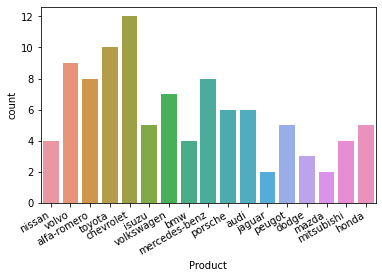

In [8]:
# visualizing the best selling products
sns.countplot(x='Product', data=df)
plt.gcf().autofmt_xdate()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(50))

In [9]:
# analyzing the maximum price
df['Price'].max()

34600

In [10]:
# analyzing the minimum price
df['Price'].min()

6007

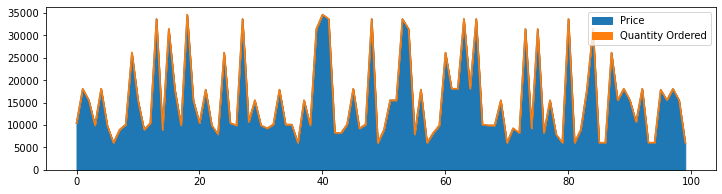

In [11]:
# visualizing if the highest prices are the least purchased or vice versa 
ax= df.plot.area(figsize=(12, 3))

In [12]:
#checking the annual sales average
df['Quantity Ordered'].mean()

47.42

In [13]:
#checking the central number of the curve
df['Quantity Ordered'].median()

46.0

In [14]:
# checking the variance
df['Quantity Ordered'].var()

196.02383838383835

In [15]:
# checking the value that is more repeated
df['Quantity Ordered'].mode()

0    46
dtype: object

In [16]:
# checking the standard deviation
df['Quantity Ordered'].std()

14.000851344966074

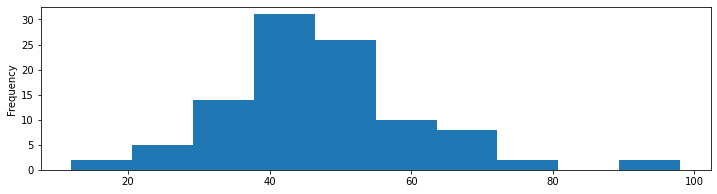

In [17]:
# visualizing the normal distribution
df['Quantity Ordered'].plot.hist(figsize=(12, 3))

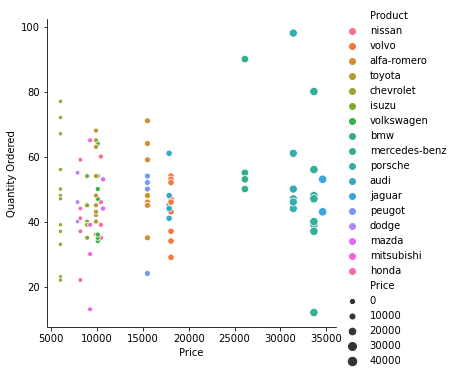

In [18]:
# viewing the most expensive brands and their respective sales
sns.relplot(x='Price', y='Quantity Ordered', data=df, hue='Product', 
           size='Price')

In [19]:
# analyzing the type of data assigned to the dates
type(df['Date'].iloc[0])

datetime.date

In [20]:
# analyzing the dates
df['Date'].value_counts()

2020-10-16    2
2020-01-21    2
2020-03-18    2
2020-02-13    2
2020-07-10    2
             ..
2020-01-18    1
2020-04-16    1
2020-12-05    1
2020-10-02    1
2020-12-02    1
Name: Date, Length: 94, dtype: int64

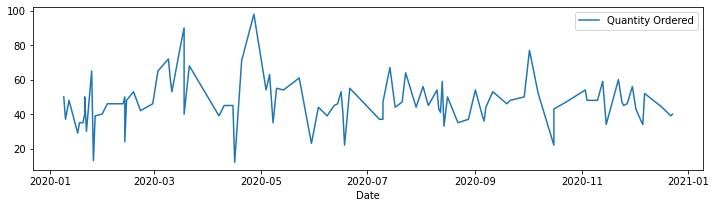

In [21]:
df.plot.line(x='Date', y='Quantity Ordered', figsize=(12, 3))

### References

[1] Car Sales Statistics; https://www.best-selling-cars.com/europe/2019-full-year-europe-best-selling-car-manufacturers-and-brands/#:~:text=Volkswagen%2C%20Renault%2C%20Ford%20and%20Peugeot,to%2015%2C805%2C752%20cars%20in%202019.

[2] Automobile Data Set; https://archive.ics.uci.edu/ml/datasets/automobile

[3] Data Structures;https://docs.python.org/3/tutorial/datastructures.html

[4] Pandas.DataFrame; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[5] Using iloc, loc, & ix to select rows and columns in Pandas DataFrames; https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

[6] Generate pseudo-random numbers; https://docs.python.org/3/library/random.html

[7] Toordinal Function In Python; https://pythontic.com/datetime/date/toordinal

[8] Python DateTime, TimeDelta, Strftime(Format) with Examples; https://www.guru99.com/date-time-and-datetime-classes-in-python.html

[9] Fromordinal() Function Of Datetime.date Class In Python; https://pythontic.com/datetime/date/fromordinal

[10] Seasonality in the Automotive Sectors; https://www.unleashedsoftware.com/blog/seasonality-automotive-sectors

[11] Normal (Gaussian) Distribution; https://www.w3schools.com/python/numpy_random_normal.asp

[12] Generating Mock Data with Python! (NumPy, Pandas, & Datetime Libraries); https://www.youtube.com/watch?v=VJBY2eVtf7o